In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

import pickle

In [2]:
purchase_df = pd.read_csv('purchase data.csv', index_col = 0)

In [3]:
purchase_df.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58693 entries, 200000001 to 200000500
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                58693 non-null  int64  
 1   Incidence          58693 non-null  int64  
 2   Brand              58693 non-null  int64  
 3   Quantity           58693 non-null  int64  
 4   Last_Inc_Brand     58693 non-null  int64  
 5   Last_Inc_Quantity  58693 non-null  int64  
 6   Price_1            58693 non-null  float64
 7   Price_2            58693 non-null  float64
 8   Price_3            58693 non-null  float64
 9   Price_4            58693 non-null  float64
 10  Price_5            58693 non-null  float64
 11  Promotion_1        58693 non-null  int64  
 12  Promotion_2        58693 non-null  int64  
 13  Promotion_3        58693 non-null  int64  
 14  Promotion_4        58693 non-null  int64  
 15  Promotion_5        58693 non-null  int64  
 16  Sex            

There are 58,693 purchase records with 23 features in this dataset. The dataset does not contain missing nor duplicated values. The explanation of each feature is as follows:

ID (numerical): a unique identifier of a customer.

Day (numerical) when the customer has visited the store.

Incidence (categorical) Purchase Incidence. Did the customer purchase a product? 0 The customer has not purchased an item from the category of interest 1 The customer has purchased an item from the category of interest

Brand (categorical) Shows which brand the customer has purchased. 0 No brand was purchased 1,2,3,4,5 Chocolate Product Brand ID

Quantity (numerical) Number of items bought by the customer from the product category of interest

Last_Inc_Brand (categorical) Shows which brand the customer has purchased on their previous store visit 0 No brand was purchased 1,2,3,4,5 Chocolate Product Brand ID

Last_Inc_Quantity (numerical) Number of items bought by the customer from the product category of interest during their previous store visit.

Price_1,2,3,4,5 (numerical) Price of an item from Brand 1,2,3,4,5 on a particular day

Promotion_1,2,3,4,5 (categorical) Indicator whether Brand 1,2,3,4,5 was on promotion or not on a particular day 

Rest features (Sex, Marital status, Age, Education, Income, Occupation, Settlement size) are consistent with the features in demographic dataset.

In [5]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

In [6]:
features = purchase_df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
purchase_segm_std = scaler.transform(features)

In [7]:
purchase_segm_pca = pca.transform(purchase_segm_std)

In [8]:
purchase_segm_kmeans_pca= kmeans_pca.predict(purchase_segm_pca)

In [9]:
purchase_predictors = purchase_df.copy()

In [10]:
purchase_predictors['Segment'] = purchase_segm_kmeans_pca
purchase_predictors= purchase_predictors.reset_index()
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In this section, I focus on descriptive analysis of the purchase data by individuals and then by segments to gain insight into customer shopping habits.

i-1. The Proportion of each Segment

i-2. Purchase Occasions and Purchase Incidences: How often each segment group go shopping?

i-3. Brand Choice: Which brand of products the customers purchase?

i-4. Revenue Comparison between segments: How much money they spend?

Based on the customer data from the company's loyalty program, I firstly compare the size of each segment. To do so, I aggregated the data by Customers then grouped by each segment.

### Aggregate the Data by Customers

In [11]:
traffic_freq = purchase_predictors[['ID','Incidence']].groupby(['ID']).count()
purchase_freq = purchase_predictors[['ID','Incidence']].groupby(['ID']).sum()
segm_info = purchase_predictors[['ID', 'Segment']].groupby(['ID']).mean()

traffic_freq = traffic_freq.rename(columns = {'Incidence': 'N_Visits'})
purchase_freq = purchase_freq.rename(columns = {'Incidence': 'N_Purchases'})

# Average number of purchases by customer ID
df_customer = traffic_freq.join(purchase_freq)
df_customer['Avg_N_Purchases'] = df_customer.N_Purchases/ df_customer.N_Visits

purchase_descr = df_customer.join(segm_info)
purchase_descr.head()

,N_Visits,N_Purchases,Avg_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


### Group-by each segment

In [13]:
segm_prop = purchase_descr[['N_Visits', 'Segment']].groupby(['Segment']).count() / purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Visits': 'Segment Proportions'}).reset_index()
segm_prop.Segment.replace({0: 'Standard', 1: 'Career-Focused',   2: "Fewer-Opportunities", 3:"Well-Off"}, inplace=True)
segm_prop.head()

,Segment,Segment Proportions
0,Standard,0.206
1,Career-Focused,0.220
2,Fewer-Opportunities,0.378
3,Well-Off,0.196


Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

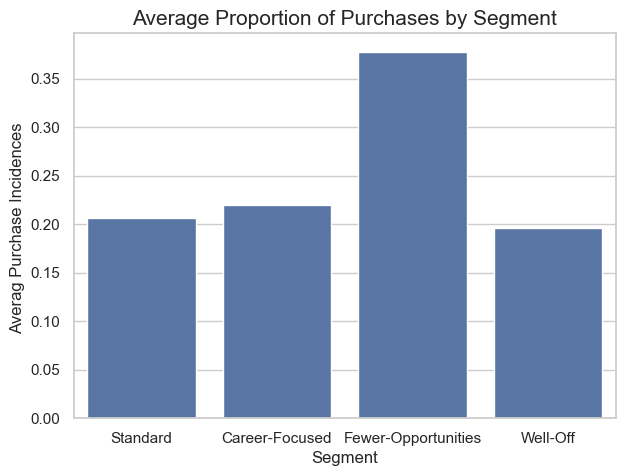

In [14]:
plt.figure(figsize=[7,5])
sns.barplot(data = segm_prop, x = 'Segment', y = 'Segment Proportions')
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

The largest segment is "Fewer-Opportunities". Almost 40 percent of customers belong to this segment. The second largest segment is "career-focused". 22.2 % of customers are in this segment. The proportion of the other groups "Standard" and "Well-Off" are similar to ca. 20%.

### Purchase Occasions and Purchase Incidences

In [15]:
# Calculate the mean by the four segments to determine the average customer behaivour in each segment.
segments_mean = purchase_descr.groupby(['Segment']).mean().reset_index()
segments_mean.Segment.replace({0: 'Standard', 1: 'Career-Focused',   2: "Fewer-Opportunities", 3:"Well-Off"}, inplace=True)
segments_mean

,Segment,N_Visits,N_Purchases,Avg_N_Purchases
0,Standard,117.699029,24.902913,0.212773
1,Career-Focused,123.454545,39.827273,0.283102
2,Fewer-Opportunities,113.730159,22.756614,0.201588
3,Well-Off,117.295918,34.602041,0.284478


In [16]:
# Calculate the standard deviation by segments. It determines how homogoneus each of the segments is.
segments_std = purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

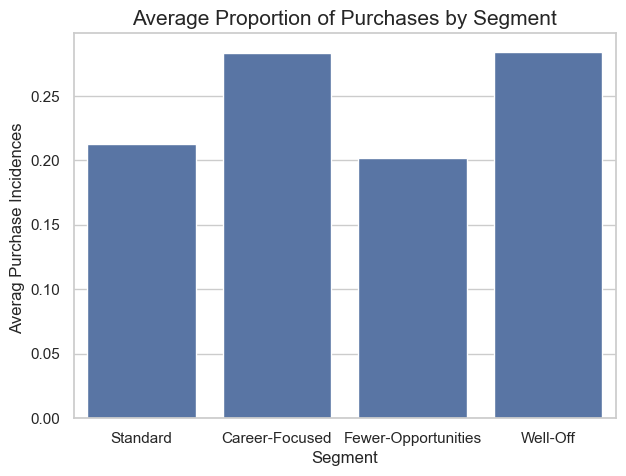

In [18]:
# Plot the average proportion of purchases.
avg_N_Purchase_in_percentage = segments_mean.Avg_N_Purchases*100
plt.figure(figsize=[7,5])
sns.barplot(data = segments_mean, x = 'Segment', y = 'Avg_N_Purchases')
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

### Brand Choice

Now we come to the question: Which brand is the customer going to choose? I focused on the observations only where customers have bought at least one chocolate candy bar.

In [20]:
purchase_incidence = purchase_predictors.query('Incidence == 1')
brand_dummies = pd.get_dummies(purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = purchase_incidence['Segment'], purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,2,200000001
11,False,False,False,False,True,2,200000001
19,True,False,False,False,False,2,200000001
24,False,False,False,True,False,2,200000001
29,False,True,False,False,False,2,200000001


In [21]:
brand_ID = brand_dummies.groupby(['ID'], as_index = True).mean() # group by each customer
mean_brand_segment = brand_ID.groupby(['Segment'], as_index = True).mean() # group by each segment

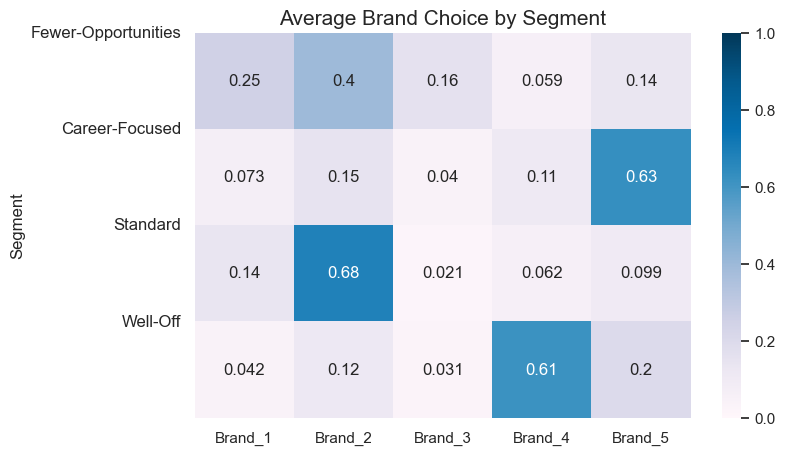

In [26]:
plt.figure(figsize=[8,5])
sns.heatmap(mean_brand_segment, vmin = 0, vmax = 1, cmap = 'PuBu', annot = True)
plt.yticks([0, 1, 2, 3], ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'], rotation = 0, fontsize = 12)
plt.title('Average Brand Choice by Segment', fontsize = 15)
plt.show()

###  Dissecting the Revenue by Segment

In [30]:
# Filter the datapoints by each brand.
brand_1 = purchase_predictors.query('Brand ==1')
brand_2 = purchase_predictors.query('Brand ==2')
brand_3 = purchase_predictors.query('Brand ==3')
brand_4 = purchase_predictors.query('Brand ==4')
brand_5 = purchase_predictors.query('Brand ==5')

# Compute the revenue of each brand
brand_1.loc[:, 'Revenue_Brand_1'] = brand_1['Price_1'] * brand_1['Quantity']
brand_2.loc[:, 'Revenue_Brand_2'] = brand_2['Price_2'] * brand_2['Quantity']
brand_3.loc[:, 'Revenue_Brand_3'] = brand_3['Price_3'] * brand_3['Quantity']
brand_4.loc[:, 'Revenue_Brand_4'] = brand_4['Price_4'] * brand_4['Quantity']
brand_5.loc[:, 'Revenue_Brand_5'] = brand_5['Price_5'] * brand_5['Quantity']

# Aggregate the revenues 
brand_1_segm = brand_1.groupby('Segment')['Revenue_Brand_1'].sum()
brand_2_segm = brand_2.groupby('Segment')['Revenue_Brand_2'].sum()
brand_3_segm = brand_3.groupby('Segment')['Revenue_Brand_3'].sum()
brand_4_segm = brand_4.groupby('Segment')['Revenue_Brand_4'].sum()
brand_5_segm = brand_5.groupby('Segment')['Revenue_Brand_5'].sum()

segments_brand_revenue = pd.DataFrame({'Segment' :  ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'] ,
                                      'Revenue_Brand_1': brand_1_segm.values, 
                                      'Revenue_Brand_2': brand_2_segm.values, 
                                      'Revenue_Brand_3': brand_3_segm.values, 
                                      'Revenue_Brand_4': brand_4_segm.values, 
                                      'Revenue_Brand_5': brand_5_segm.values})

# segments_brand_revenue.loc[:, 'Total_Rev'] = segments_brand_revenue.sum(axis =1)
# segments_brand_revenue.loc[:,'Segment Proportions'] = segm_prop['Segment Proportions']

C:\Users\pranj\AppData\Local\Temp\ipykernel_14656\618357890.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_1.loc[:, 'Revenue_Brand_1'] = brand_1['Price_1'] * brand_1['Quantity']
C:\Users\pranj\AppData\Local\Temp\ipykernel_14656\618357890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_2.loc[:, 'Revenue_Brand_2'] = brand_2['Price_2'] * brand_2['Quantity']
C:\Users\pranj\AppData\Local\Temp\ipykernel_14656\618357890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [31]:
segments_brand_revenue

,Segment,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5
0,Fewer-Opportunities,2611.19,4768.52,3909.17,861.38,2439.75
1,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06
2,Standard,2258.90,13955.14,716.25,1629.31,2230.50
3,Well-Off,699.47,1298.23,731.35,14185.57,5509.69


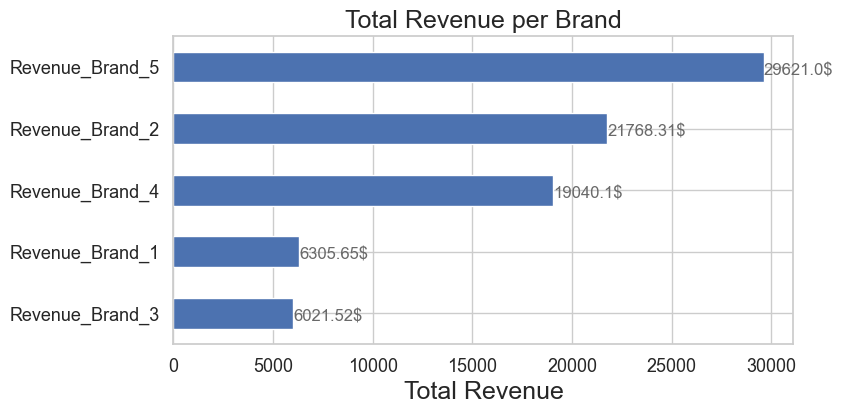

In [32]:
brand_rev = segments_brand_revenue.iloc[:,1:6].sum(axis=0)
ax = brand_rev.sort_values(ascending=False).plot(kind='barh', figsize=(8,4), color="b", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Total Revenue per Brand", fontsize=18)
ax.set_xlabel("Total Revenue", fontsize=18);

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2))+'$', fontsize=12, color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

In [33]:
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [34]:
purchase_predictors.Segment.replace({0: 'Standard', 1: 'Career-Focused',   2: "Fewer-Opportunities", 3:"Well-Off"}, inplace=True)

In [35]:
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities


### Purchase Elasticity Model

In [64]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Extract necessary columns
columns = ['Segment', 'Brand', 'Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5',
           'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']

df_segmented = purchase_predictors[columns]

# Calculate log of quantity and price
df_segmented['Log_Quantity'] = np.log(df_segmented['Quantity'] + 1)
for i in range(1, 6):
    df_segmented[f'Log_Price_{i}'] = np.log(df_segmented[f'Price_{i}'])

# Function to fit and calculate elasticity
def calculate_elasticity(data, price_col, quantity_col, promo_col=None):
    X = data[[price_col]]
    if promo_col:
        X[promo_col] = data[promo_col]
    y = data[quantity_col]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Extract elasticity
    elasticity = model.params[price_col]
    return elasticity

# Segregate data based on promotion status, segment, and brand
elasticities = {'No_Promotion': {}, 'Promotion': {}}
for segment in df_segmented['Segment'].unique():
    for brand in range(1, 6):
        brand_data = df_segmented[df_segmented['Brand'] == brand]
        segment_data = brand_data[brand_data['Segment'] == segment]
        
        for promo in ['No_Promotion', 'Promotion']:
            if promo == 'No_Promotion':
                condition = (segment_data['Promotion_1'] == 0) & (segment_data['Promotion_2'] == 0) & \
                            (segment_data['Promotion_3'] == 0) & (segment_data['Promotion_4'] == 0) & \
                            (segment_data['Promotion_5'] == 0)
            else:
                condition = (segment_data['Promotion_1'] == 1) | (segment_data['Promotion_2'] == 1) | \
                            (segment_data['Promotion_3'] == 1) | (segment_data['Promotion_4'] == 1) | \
                            (segment_data['Promotion_5'] == 1)
            
            promo_data = segment_data[condition]
            
            if not promo_data.empty:
                # Calculate elasticity for each price column
                for i in range(1, 6):
                    price_col = f'Log_Price_{i}'
                    quantity_col = 'Log_Quantity'
                    promo_col = f'Promotion_{i}' if promo == 'Promotion' else None
                    
                    elasticity = calculate_elasticity(promo_data, price_col, quantity_col, promo_col)
                    elasticities[promo][f'Segment_{segment}_Brand_{brand}_Price_{i}'] = elasticity
                    # print(f'Segment {segment}, Brand {brand}, Price {i}, {promo} elasticity: {elasticity}')


In [65]:
# Output elasticities for each segment, brand, and promotional status
print(elasticities)

{'No_Promotion': {'Segment_Fewer-Opportunities_Brand_1_Price_1': -1.801860431997965, 'Segment_Fewer-Opportunities_Brand_1_Price_2': -0.9492356470096176, 'Segment_Fewer-Opportunities_Brand_1_Price_3': -0.6738762493210957, 'Segment_Fewer-Opportunities_Brand_1_Price_4': -0.0883209987326739, 'Segment_Fewer-Opportunities_Brand_1_Price_5': -0.3016276296314028, 'Segment_Fewer-Opportunities_Brand_2_Price_1': -0.20155491634698902, 'Segment_Fewer-Opportunities_Brand_2_Price_2': -0.7610568861146465, 'Segment_Fewer-Opportunities_Brand_2_Price_3': 0.03790209728521361, 'Segment_Fewer-Opportunities_Brand_2_Price_4': -0.035913252369449034, 'Segment_Fewer-Opportunities_Brand_2_Price_5': 0.2099575125457186, 'Segment_Fewer-Opportunities_Brand_3_Price_1': 2.098484728987769, 'Segment_Fewer-Opportunities_Brand_3_Price_2': 1.3788317332040745, 'Segment_Fewer-Opportunities_Brand_3_Price_3': -2.7639025950086595, 'Segment_Fewer-Opportunities_Brand_3_Price_4': -0.6743403223052687, 'Segment_Fewer-Opportunities_Bra

In [66]:
promo_status = []
segments = []
brands = []
prices = []
values = []

# Iterate through the dictionary and split keys into columns
for promo, nested_dict in elasticities.items():
    for key, value in nested_dict.items():
        promo_status.append(promo)
        
        parts = key.split('_')
        segments.append(parts[1])
        brands.append(parts[3])
        prices.append(parts[5])
        
        values.append(value)

# Create DataFrame
df = pd.DataFrame({
    'Promotion_Status': promo_status,
    'Segment': segments,
    'Brand': brands,
    'Price': prices,
    'Elasticity': values
})

# Display the DataFrame
df

,Promotion_Status,Segment,Brand,Price,Elasticity
0,No_Promotion,Fewer-Opportunities,1,1,-1.801860
1,No_Promotion,Fewer-Opportunities,1,2,-0.949236
2,No_Promotion,Fewer-Opportunities,1,3,-0.673876
3,No_Promotion,Fewer-Opportunities,1,4,-0.088321
4,No_Promotion,Fewer-Opportunities,1,5,-0.301628
...,...,...,...,...,...
195,Promotion,Standard,5,1,-0.339466
196,Promotion,Standard,5,2,-0.127637
197,Promotion,Standard,5,3,-0.075786
198,Promotion,Standard,5,4,-0.939405


In [67]:
pivot_table = df.pivot_table(index=['Segment', 'Brand'], columns=['Price', 'Promotion_Status'], values='Elasticity', aggfunc='mean')

In [68]:
styled_table = pivot_table.style \
    .set_table_styles([{'selector': 'th', 'props': [('border', '1px solid white')]}]) \
    .set_properties(**{'font-size': '12pt', 'border-collapse': 'collapse', 'border': '1px solid white'})

In [69]:
styled_table

Understanding Elasticity Values:

Elastic Demand (|E| > 1): If the absolute value of elasticity is greater than 1 (e.g., -1.8), it indicates that demand is elastic. This means that a percentage change in price leads to a larger percentage change in quantity demanded in the opposite direction. For example, a -1.8 elasticity suggests that a 1% increase in price would result in a 1.8% decrease in quantity demanded.

Inelastic Demand (|E| < 1): If the absolute value of elasticity is less than 1 (e.g., -0.66), demand is inelastic. Here, a percentage change in price causes a smaller percentage change in quantity demanded. For instance, a -0.66 elasticity implies that a 1% increase in price would result in a 0.66% decrease in quantity demanded.

Sign of Elasticity:

Negative Elasticity: A negative elasticity (e.g., -1.8) indicates an inverse relationship between price and quantity demanded. As price increases, quantity demanded decreases.
Positive Elasticity: Although less common in typical contexts like price elasticity of demand, a positive elasticity would imply that as price increases, quantity demanded also increases.
Segment Interpretation:

Practical Insight:

Actionable Insights: Use these elasticities to make decisions about pricing strategies. For example, if a segment shows highly elastic demand (|E| > 1), consider lowering prices to increase sales volume. Conversely, for segments with inelastic demand (|E| < 1), price increases may lead to higher revenue without significant loss in sales volume.